In [2]:
import numpy as np

import matplotlib.pyplot as plt 

from toolkit import *



#  Before Start

Please download (more) samples from [OneDrive](https://1drv.ms/f/c/347c1b40c8c6e5ec/Ej5OQVE_APpOnNuP-ZXpnZcBnr_-ix5W-twQcYIJ-dvW2A?e=YcBSPF), and put them into `data` and `results` folders, respectively.

In [3]:
#data_path = 'data/0617-259694+imrt+MOS_33896.npz'
data_path = 'data/HNC_001+A4Ac+MOS_25934.npz'
data_npz = np.load(data_path, allow_pickle=True)
data_dict = dict(data_npz)['arr_0'].item()
print (data_dict.keys())
print (data_dict['img'].shape)
print(data_dict['spacing'])
print(data_dict['size'])
print(data_dict['angle_list'])


dict_keys(['Submand-PTV', 'SpinalCord_05', 'SpinalCord', 'Shoulders', 'Posterior_Neck', 'Pituitary', 'PharynxConst', 'PharConst-PTV', 'Parotids-PTV', 'Parotids', 'ParotidIps-PTV', 'ParotidCon-PTV', 'PTV_Total', 'PTV70', 'OralCavity', 'OpticNerve_R', 'OpticNerve_L', 'OCavity-PTV', 'Mandible-PTV', 'Mandible', 'Lungs', 'Lips', 'Lens_R', 'Lens_L', 'Larynx-PTV', 'Larynx', 'LacrimalGlands', 'Eyes', 'Esophagus', 'Cochlea_R', 'Cochlea_L', 'Chiasm', 'BrainStem_03', 'BrainStem', 'Brain', 'BrachialPlexus', 'Body', 'SubmandL-PTV', 'SubmandR-PTV', 'Submandibular', 'Thyroid', 'Thyroid-PTV', 'Trachea', 'all_mask', 'img', 'dose', 'dose_scale', 'isVMAT', 'isocenter', 'angle_list', 'origin', 'spacing', 'direction', 'size', 'old_angle_plate', 'angle_plate', 'beam_plate', 'RingPTVHigh', 'RingPTVLow', 'PTVHighOPT', 'PTVLowOPT', 'PTVLow-PTVMid', 'PTVLow'])
(128, 137, 175)
(2.5, 2.5, 2.0)
(128, 137, 175)
[  1.   3.   5.   7.   9.  11.  13.  15.  17.  19.  21.  23.  25.  27.
  29.  31.  33.  35.  37.  39.  41

(96, 100, 151) [48.0, 64.0, 55.0]


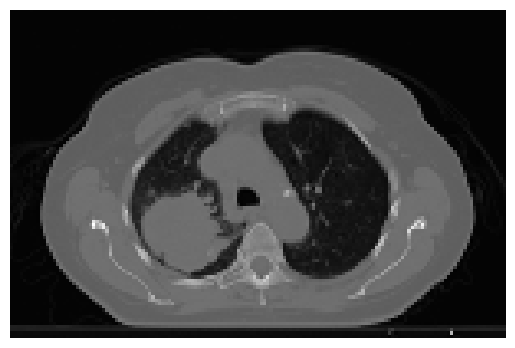

In [3]:
print (data_dict['PTV'].shape, data_dict['isocenter'])
save_fig = True

plt.tight_layout(pad=0)
plt.imshow(data_dict['img'][48], 'gray')

if save_fig:
    plt.axis('off')
    plt.savefig('figs/img.png', bbox_inches='tight', pad_inches=0)

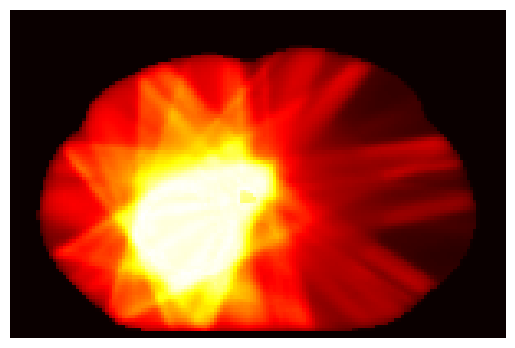

In [4]:

save_fig = True

plt.tight_layout(pad=0)
plt.imshow(data_dict['dose'][48], 'hot')

if save_fig:
    plt.axis('off')
    plt.savefig('figs/dose.png', bbox_inches='tight', pad_inches=0)

(96, 100, 151) [48.0, 64.0, 55.0]


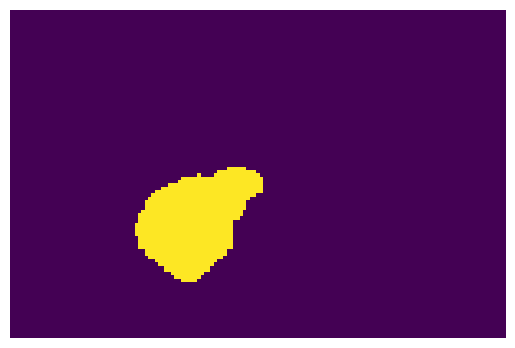

In [5]:
print (data_dict['PTV'].shape, data_dict['isocenter'])
save_fig = True

plt.tight_layout(pad=0)
plt.imshow(data_dict['PTV'][48])

if save_fig:
    plt.axis('off')
    plt.savefig('figs/PTV.png', bbox_inches='tight', pad_inches=0)



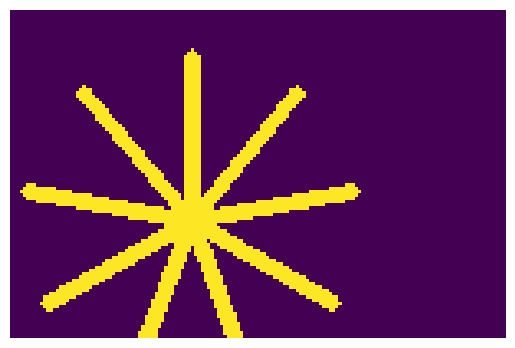

In [6]:

angle_plate = PlotGantry(bg_img = np.zeros_like(data_dict['PTV'][0]), 
                         angles = data_dict['angle_list'], 
                         x = int(data_dict['isocenter'][2]), 
                         y = int(data_dict['isocenter'][1]),
                        length =  50,
                         width = 4)
plt.imshow(angle_plate)

if save_fig:
    plt.axis('off')
    plt.savefig('figs/angle_plate.png', bbox_inches='tight', pad_inches=0)

In [7]:
print (data_dict['angle_list'])

[  0. 160. 280. 320.  40. 200.  80. 240. 120.]


the beam angle is: 0.0


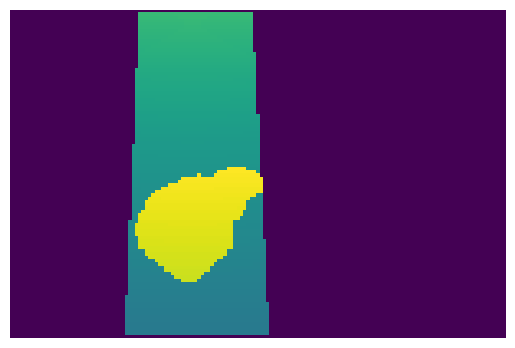

In [8]:
all_beam_plate = []

beam_plate1 = get_per_beamplate(data_dict['PTV'].copy(), data_dict['isocenter'],
                                 [2, 2.5, 2.5], data_dict['angle_list'][0], with_distance = True).astype('float')
print ('the beam angle is:', data_dict['angle_list'][0])

plt.imshow(beam_plate1[48] + data_dict['PTV'][48])

if save_fig:
    plt.axis('off')
    plt.savefig('figs/beam_plate1.png', bbox_inches='tight', pad_inches=0)



the beam angle is: 160.0


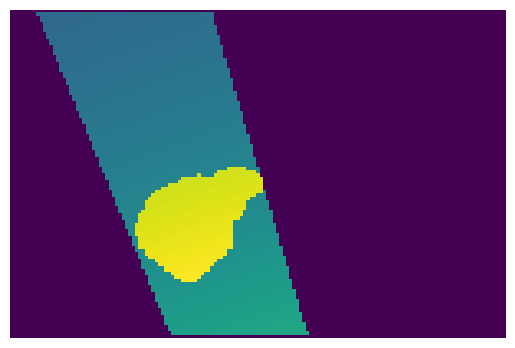

In [9]:
beam_plate2 = get_per_beamplate(data_dict['PTV'].copy(), data_dict['isocenter'],
                                [2, 2.5, 2.5], data_dict['angle_list'][1], with_distance = True).astype('float')
print ('the beam angle is:', data_dict['angle_list'][1])

plt.imshow(beam_plate2[48] + data_dict['PTV'][48])

if save_fig:
    plt.axis('off')
    plt.savefig('figs/beam_plate2.png', bbox_inches='tight', pad_inches=0)

the beam angle is: 280.0


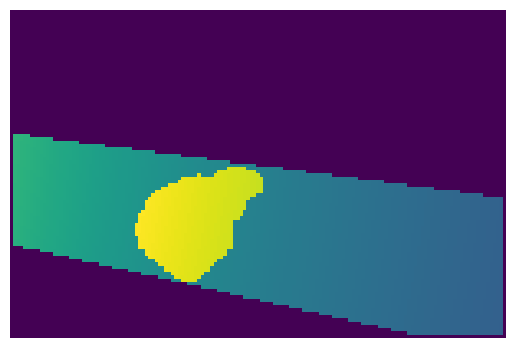

In [15]:
beam_plate3 = get_per_beamplate(data_dict['PTV'].copy(), data_dict['isocenter'],
                                    [2, 2.5, 2.5], data_dict['angle_list'][2], with_distance = True).astype('float')
print ('the beam angle is:', data_dict['angle_list'][2])

plt.imshow(beam_plate3[48] + data_dict['PTV'][48])

if save_fig:
    plt.axis('off')
    plt.savefig('figs/beam_plate3.png', bbox_inches='tight', pad_inches=0)

the beam angle is: 320.0


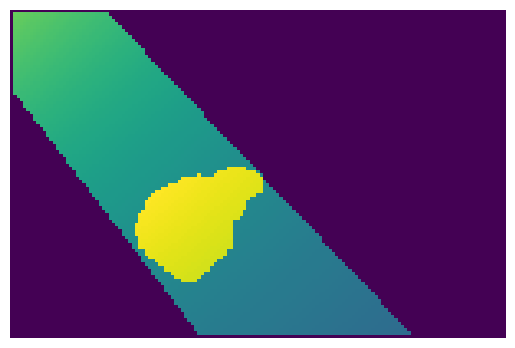

In [10]:
beam_plate4 = get_per_beamplate(data_dict['PTV'].copy(), data_dict['isocenter'],
                                    [2, 2.5, 2.5], data_dict['angle_list'][3], with_distance = True).astype('float')
print ('the beam angle is:', data_dict['angle_list'][3])

plt.imshow(beam_plate4[48] + data_dict['PTV'][48])

if save_fig:
    plt.axis('off')
    plt.savefig('figs/beam_plate4.png', bbox_inches='tight', pad_inches=0)

the beam angle is: 40.0


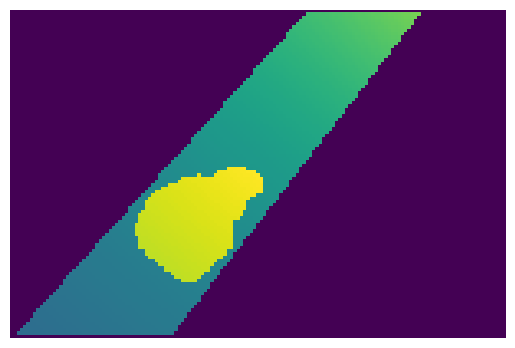

In [11]:
beam_plate5 = get_per_beamplate(data_dict['PTV'].copy(), data_dict['isocenter'],
                                    [2, 2.5, 2.5], data_dict['angle_list'][4], with_distance = True).astype('float')
print ('the beam angle is:', data_dict['angle_list'][4])

plt.imshow(beam_plate5[48] + data_dict['PTV'][48])

if save_fig:
    plt.axis('off')
    plt.savefig('figs/beam_plate5.png', bbox_inches='tight', pad_inches=0)


the beam angle is: 200.0


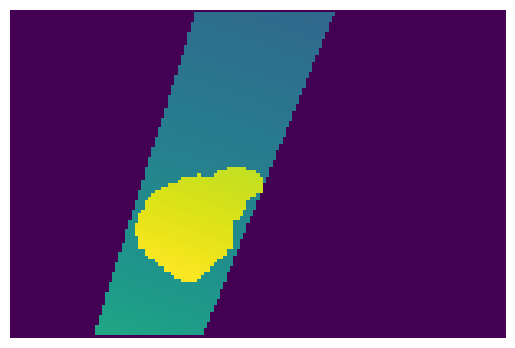

In [12]:
beam_plate6 = get_per_beamplate(data_dict['PTV'].copy(), data_dict['isocenter'],
                                    [2, 2.5, 2.5], data_dict['angle_list'][5], with_distance = True).astype('float')
print ('the beam angle is:', data_dict['angle_list'][5])

plt.imshow(beam_plate6[48] + data_dict['PTV'][48])

if save_fig:
    plt.axis('off')
    plt.savefig('figs/beam_plate6.png', bbox_inches='tight', pad_inches=0)

the beam angle is: 80.0


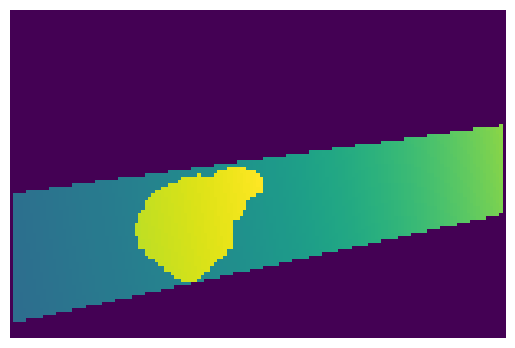

In [13]:
beam_plate7 = get_per_beamplate(data_dict['PTV'].copy(), data_dict['isocenter'],
                                    [2, 2.5, 2.5], data_dict['angle_list'][6], with_distance = True).astype('float')
print ('the beam angle is:', data_dict['angle_list'][6])    

plt.imshow(beam_plate7[48] + data_dict['PTV'][48])

if save_fig:
    plt.axis('off')
    plt.savefig('figs/beam_plate7.png', bbox_inches='tight', pad_inches=0)

the beam angle is: 240.0


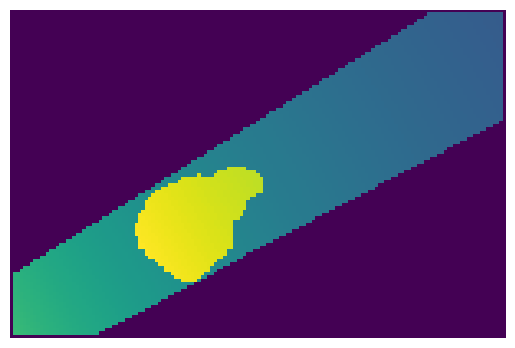

In [14]:
beam_plate8 = get_per_beamplate(data_dict['PTV'].copy(), data_dict['isocenter'],
                                    [2, 2.5, 2.5], data_dict['angle_list'][7], with_distance = True).astype('float')
print ('the beam angle is:', data_dict['angle_list'][7])
plt.imshow(beam_plate8[48] + data_dict['PTV'][48])  

if save_fig:
    plt.axis('off')
    plt.savefig('figs/beam_plate8.png', bbox_inches='tight', pad_inches=0)

the beam angle is: 120.0


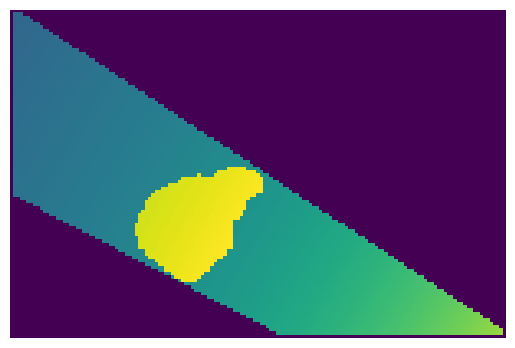

In [15]:
beam_plate9 = get_per_beamplate(data_dict['PTV'].copy(), data_dict['isocenter'],
                                    [2, 2.5, 2.5], data_dict['angle_list'][8], with_distance = True).astype('float')
print ('the beam angle is:', data_dict['angle_list'][8])
plt.imshow(beam_plate9[48] + data_dict['PTV'][48])

if save_fig:
    plt.axis('off')
    plt.savefig('figs/beam_plate9.png', bbox_inches='tight', pad_inches=0)

In [16]:
final_beam_plate = np.zeros_like(data_dict['PTV']).astype('float32')

for i in range(len(data_dict['angle_list'])):
    gantry_angle = data_dict['angle_list'][i]
    
    tmp_plate = get_per_beamplate(data_dict['PTV'].copy(), data_dict['isocenter'], [2, 2.5, 2.5], gantry_angle).astype('float32')
    final_beam_plate += tmp_plate

    

0.0


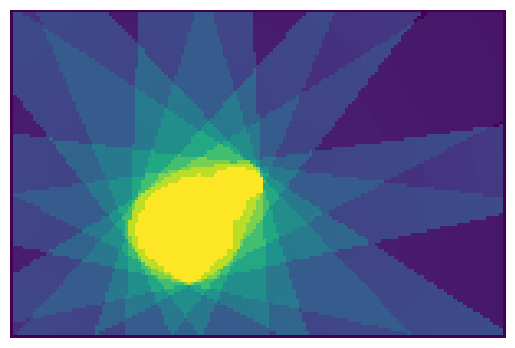

In [17]:
print (np.sum(np.abs(final_beam_plate - data_dict['beam_plate'])))
plt.imshow(final_beam_plate[48] + data_dict['PTV'][48])

if save_fig:
    plt.axis('off')
    plt.savefig('figs/final_beam_plate.png', bbox_inches='tight', pad_inches=0)